## Problem Metadata 
DO NOT DELETE (JSON Block; the metadata and course context MUST be in the first cell)

```json
{
    "problem_title": "compressorMultistageCoolingPyCalor",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["medium"],
    "topic": "Entropy",
    "lecture_reference": {
        "lecture_id": "",
        "subtopics": [
            {
              "key": "Fa25-L7c-3.0",
              "title": "Multisage Compressor With Cooling",
            }
        ]
    },
    "book_reference": {
        "chapter_number": 7,
        "title": "Entropy",
        "sections": [
            "Reversible Steady-Flow Work",
            "Minimizing the Compressor Work",
        ]
    },
    "notes": ""
}
```

## 1. Problem Statement
Problem 7-190 from Cengels Thermodynamics 9th Edition

Air enters a two-stage compressor at 100 kPa and 27°C and is compressed to 625 kPa. The pressure ratio across each stage is the same, and the air is cooled to the initial temperature between the two stages. 

**Goal**:
- Assuming the compression process to be isentropic, determine the power input to the compressor for a mass flow rate of 0.15 kg/s.
- What would your answer be if only one stage of compression were used?

## 2. Schematic
Draw two compressors connected in series. State 1 and 2 are the inlet and outlet of the first air compressor, respectively. States 3 and 4 are at the inlet and exit of the second air compressor, respectively. Heat is transferred out in between states 2 and 3. Indicate that the compressors are connected together by a shaft and that work is being transferred in. 

## 3. Assumptions and Approximations
* **Control Volume** (mass crosses the boundary).
* **Properties** We will use pyCalor to determine properties.
* Neglect changes in kinetic and potential energy ($\Delta KE\approx0$, $\Delta PE\approx0$). (Justification: The velocities are typically low, or the change in height is negligible compared to the enthalpy change.)
* **Reversible and Adiabatic processes**: Compression from states 1 to 2 and 3 to 4 are considered reversible and adiabatic.
* **Steady-flow process** ($\Delta m_\text{CV}= 0$, $\Delta E_\text{CV}= 0$, $\Delta S_\text{CV}= 0$).
* We have a single inlet and outlet ($\dot{m}_\text{in}$ and $\dot{m}_\text{out}$).
* **Isobaric**: Heat exchangers are isobaric devices. (Justification: Negligible changes in pressure between the inlet and exit.)

## 4. Physical Laws and Governing Equations
1.  **First Law of Thermodynamics (Energy Balance for Control Volume):**
    $$\frac{dE_\text{CV}}{dt}=\dot{E}_\text{in}-\dot{E}_\text{out}$$

2.  **Conservation of Mass (Mass Balance for a Control Volume):**
    $$\frac{dm_\text{CV}}{dt}=\dot{m}_\text{in}-\dot{m}_\text{out}$$

Since this is a steady flow process, we can write:
$$\dot{E}_\text{in}=\dot{E}_\text{out}$$

$$\dot{m}_\text{in}=\dot{m}_\text{out}=\dot{m}$$

We can then write for a compressor:
$$\dot{W}_\text{in}+\dot{Q}_\text{in}+\dot{m}\left(h_1+\frac{w_1^2}{2}+g~z_1\right)=\dot{W}_\text{out}+\dot{Q}_\text{out}+\dot{m}\left(h_2+\frac{w_1^2}{2}+g~z_2\right)$$

Neglecting changes in kinetic and potential energy:
$$\dot{W}_\text{in}+\dot{Q}_\text{in}+\dot{m}h_1=\dot{W}_\text{out}+\dot{Q}_\text{out}+\dot{m}h_2 $$

Since the compressor operates isentropically, we can assume that it is adiabatic:
$$\dot{W}_\text{in}+\dot{m}h_1=\dot{W}_\text{out}+\dot{m}h_2$$

There is only work transferred into the compressor, not out. Therefore:
$$\dot{W}_\text{in}=\dot{m}\left(h_2-h_1\right)$$

We can apply this formula for the first and second compressor as:
$$\dot{W}_\text{12,in}=\dot{m}(h_2-h_1)$$
$$\dot{W}_\text{34,in}=\dot{m}(h_4-h_3)$$

The total work in is then:
$$\dot{W}_\text{in}=\dot{W}_\text{12,in}+\dot{W}_\text{34,in}$$

In [3]:
## 5. Properties (Code Cell)
!pip install pyCalor
from pyCalor import thermo as th

substance = 'air'
mdot_kgPerS = 0.15

# Properties
p1_Pa = 100e3
T1_C = 27
T1_K = T1_C +273.15

pressureRatio = 2.5

p2_Pa = p1_Pa * pressureRatio

p3_Pa = p2_Pa
T3_C = 27
T3_K = T3_C + 273.15

p4_Pa = p3_Pa * pressureRatio

# state 1
st1 = th.state(substance,T=(T1_C,'C'),p=(p1_Pa,'Pa'),name='1')
h1_JperKg = st1.h*1e3
s1_JperKgperK = st1.s*1e3

# state 2
s2_JperKgperK = s1_JperKgperK
st2 = th.state(substance,s=(s2_JperKgperK,'J/kg K'),p=(p2_Pa,'Pa'),name='2')
h2_JperKg = st2.h*1e3
T2_K = st2.T

# state 3
st3 = th.state(substance,T=(T3_C,'C'),p=(p3_Pa,'Pa'),name='3')
h3_JperKg = st3.h*1e3
s3_JperKgperK = st3.s*1e3

# state 4
s4_JperKgperK = s3_JperKgperK
st4 = th.state(substance,s=(s4_JperKgperK,'J/kg K'),p=(p4_Pa,'Pa'),name='4')
h4_JperKg = st4.h*1e3
T4_K = st4.T

# process
pr = th.process([(st1,st2),(st2,st3),(st3,st4)])

(a) Wdot_kW = 27.1 kW.
(b) Wdot_kW = 31.1 kW.


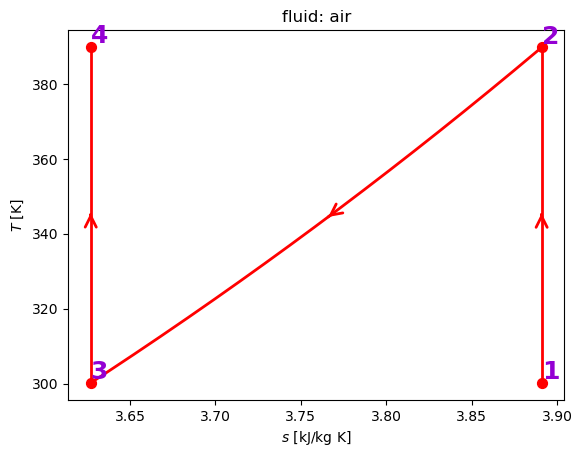

In [5]:
# 6 Calculations (Code Cell)
# Work in
Wdot_W = mdot_kgPerS*((h2_JperKg - h1_JperKg)+(h4_JperKg - h3_JperKg))
Wdot_kW = Wdot_W/1000# ; print(Wdot_kW)
print('(a) Wdot_kW = {0:1.1f} kW.'.format(Wdot_kW))

# Now we can see how much work we would have to do if we were to do the same process with a single compressor.
s2_JperKgperK_ = s1_JperKgperK
st2_ = th.state(substance,s=(s2_JperKgperK_,'J/kg K'),p=(p4_Pa,'Pa'),name='2_')

h2_JperKg_ = st2_.h*1e3
T2_K_ = st2_.T
Wdot_W_ = mdot_kgPerS*((h2_JperKg_ - h1_JperKg))
Wdot_kW_ = Wdot_W_/1000# ; print(Wdot_kW)
print('(b) Wdot_kW = {0:1.1f} kW.'.format(Wdot_kW_))

# Plotting
fig1=pr.plot("Ts");
# fig1.savefig("figure_1_Ts.pdf")

## 7. Summary and Reasoning
We see that by cooling the air in between the first and second compressor, we do not need to do as much work.  

THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---